In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [6]:
X,y = make_blobs(n_samples=500,n_features=2,centers = 5,random_state=20)

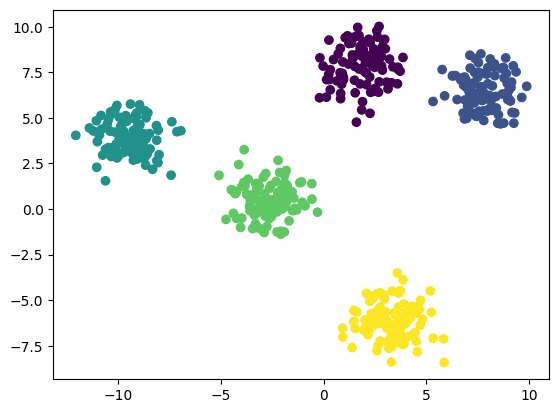

In [7]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [8]:
def initialize_cluster(k = 2,n_features = 2,min = -10,max = 10):
    clusters = []
    for i in range(k):
        cluster = {}
        cluster['center'] = (max-min)*np.random.rand(n_features)+min
        cluster['points'] = []
        clusters.append(cluster)
    return clusters

In [9]:
clusters = initialize_cluster(5,2,np.array([-10,-5]),np.array([10,5]))
clusters

[{'center': array([ 8.06235087, -4.02644235]), 'points': []},
 {'center': array([-7.01350542,  2.687425  ]), 'points': []},
 {'center': array([0.51216107, 2.47600351]), 'points': []},
 {'center': array([-5.68423259,  3.74535954]), 'points': []},
 {'center': array([-4.51202387,  0.54446312]), 'points': []}]

In [10]:
def distance(p1,p2):
    return np.sqrt(np.sum((p2-p1)**2))

In [12]:
def assign_points(X,clusters):
    for i in range(X.shape[0]):
        dist = []
        for c in clusters:
            dist.append(distance(X[i],c['center']))
            
        clusters[np.argmin(dist)]['points'].append(X[i])

In [13]:
assign_points(X,clusters)
clusters

[{'center': array([ 8.06235087, -4.02644235]),
  'points': [array([ 4.29332258, -5.33145317]),
   array([ 2.01000339, -6.08573663]),
   array([ 3.32779451, -4.50252634]),
   array([ 3.69387423, -6.79370109]),
   array([ 1.46863498, -5.5657943 ]),
   array([ 3.65429837, -5.37026299]),
   array([ 3.30063146, -6.67294308]),
   array([ 4.71604127, -5.00354801]),
   array([ 2.8524175 , -6.18427095]),
   array([ 4.33722677, -6.89465345]),
   array([ 2.07942737, -4.62548522]),
   array([ 4.19606818, -5.98392352]),
   array([ 1.61461784, -5.64329163]),
   array([ 3.65730665, -4.61524092]),
   array([ 2.5795736 , -6.13795188]),
   array([ 3.87235673, -5.34772939]),
   array([ 5.85744027, -8.41763437]),
   array([ 3.02276074, -5.63876274]),
   array([ 2.24173869, -6.59723824]),
   array([ 3.9021795, -5.2124967]),
   array([ 2.63805385, -4.63726445]),
   array([ 4.06563011, -5.87012684]),
   array([ 1.47247405, -6.16627041]),
   array([ 3.83607934, -7.43640516]),
   array([ 3.09463913, -6.1161708

In [14]:
def plot_clusters(clusters):
    for cluster in clusters:
        if len(cluster['points']) != 0:
            p = np.array(cluster['points'])
            plt.scatter(p[:,0],p[:,1])
        c = cluster['center']
        plt.scatter(c[0],c[1],c = 'black')
    plt.show()

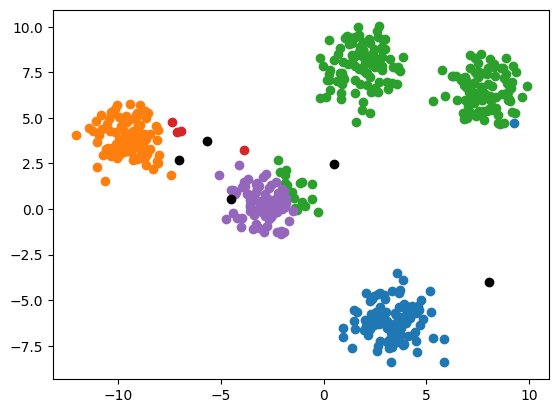

In [15]:
plot_clusters(clusters)

In [17]:
def update_clusters(clusters):
    is_updated = False
    for cluster in clusters:
        if len(cluster['points']) != 0:
            new_center = np.mean(cluster['points'],axis = 0)
            if np.any(new_center != cluster['center']):
                is_updated = True
                cluster['center'] = new_center
            
            cluster['points'] = []
    return is_updated

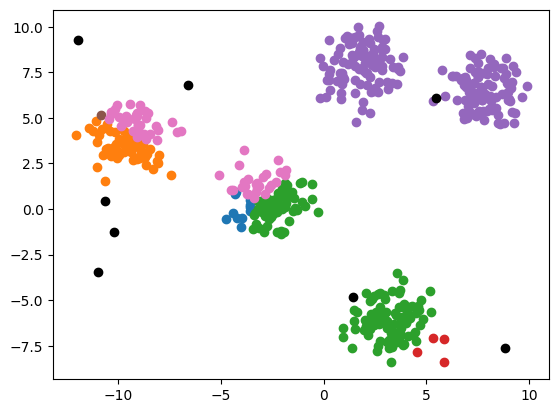

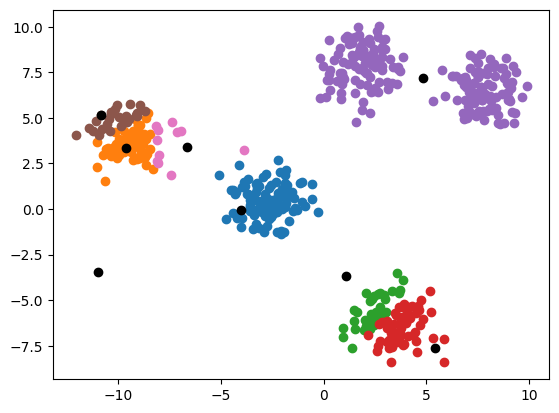

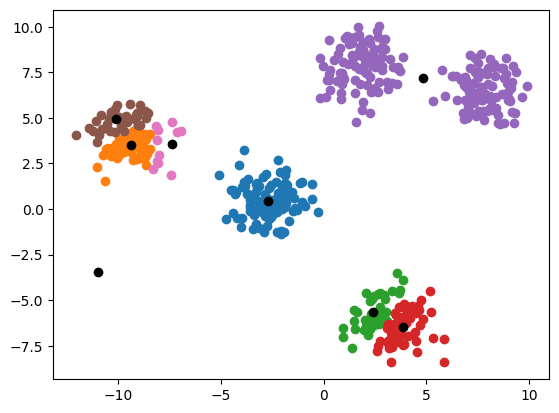

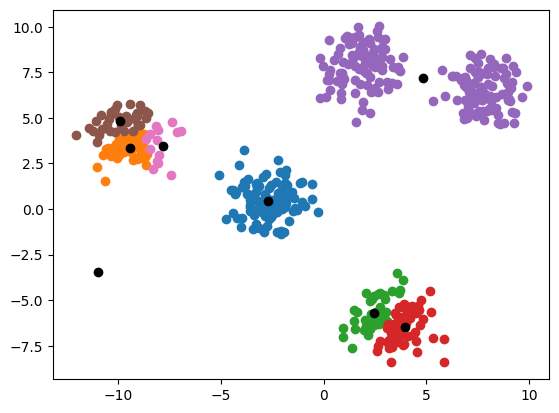

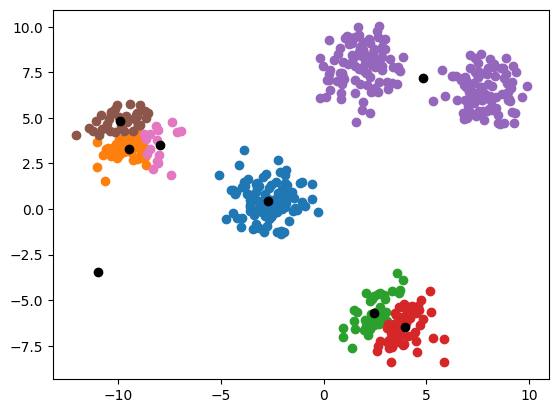

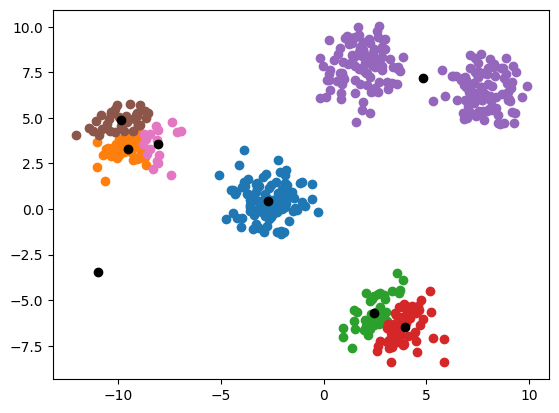

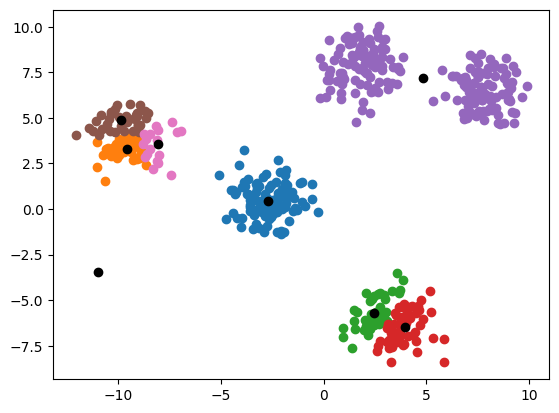

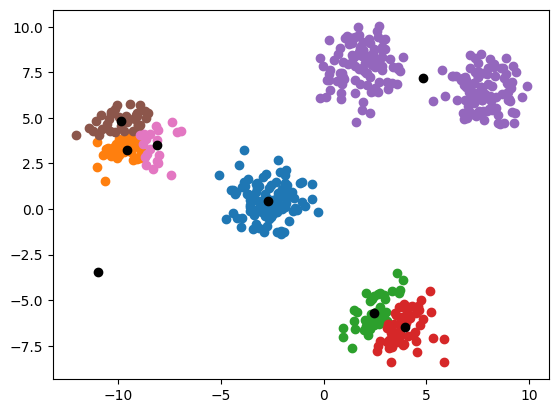

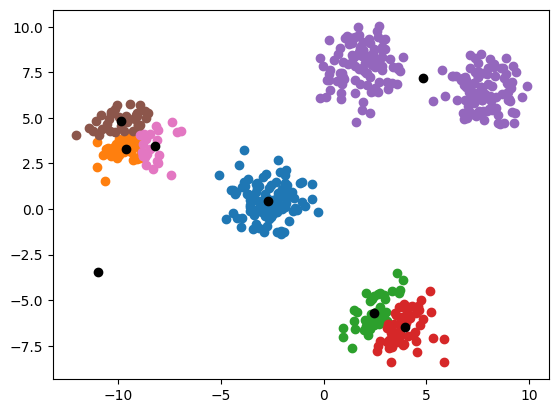

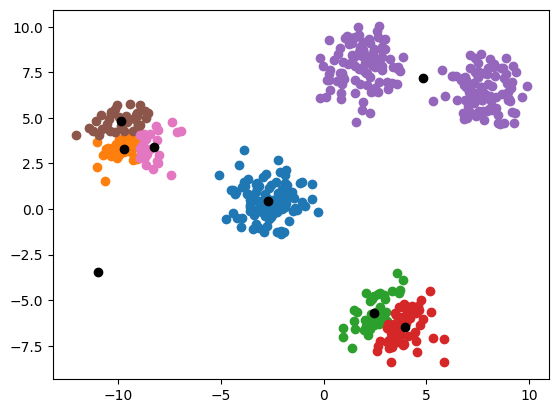

In [23]:
clusters = initialize_cluster(k = 8,n_features=2,min = np.min(X,axis = 0),max = np.max(X,axis = 0))
for i in range(10):
    assign_points(X,clusters)
    plot_clusters(clusters)
    is_updated = update_clusters(clusters)
    if is_updated == False:
        break

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [30]:
clf = KMeans(n_clusters=5)

In [31]:
clf.fit(X)

KMeans(n_clusters=5)

In [32]:
clf.inertia_

944.4282081113831

In [33]:
clf.cluster_centers_

array([[ 1.86103043,  7.92313022],
       [ 3.28857717, -6.15519417],
       [-9.41045484,  3.90984505],
       [-2.70399202,  0.46108905],
       [ 7.78664491,  6.45659035]])

In [35]:
# clf.predict(X)

In [36]:
sil = []
wcss = []
for i in range(2,10):
    clf = KMeans(n_clusters=i)
    clf.fit(X)
    wcss.append(clf.inertia_)
    sil.append(silhouette_score(X,clf.predict(X)))

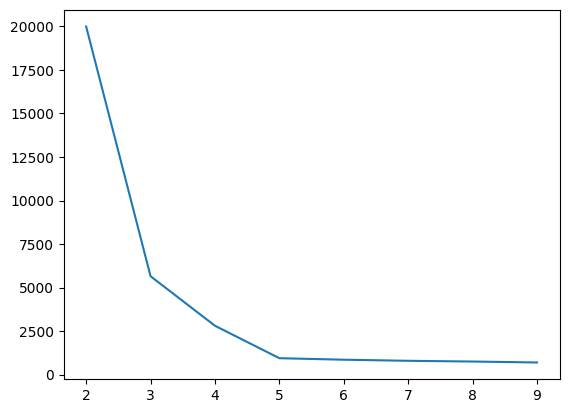

In [37]:
plt.plot([i for i in range(2,10)],wcss)

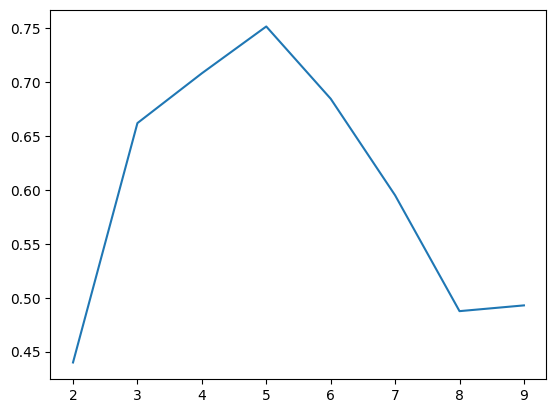

In [38]:
plt.plot([i for i in range(2,10)],sil)

In [ ]:
clf